# Proyecto Statistical Learning 1

* Silvio Alejandro Urizar Salazar
* 23008607

## Descripción del proyecto

Este proyecto consiste en hacer un análisis sobre un dataset elegido por el estudiante, y debe aplicar un modelo de Machine Learning para realizar una predicción. Para el caso de este proyecto, se eligión un dataset de vinos italianos y sus propiedades. Mediante este dataset, se pretende clasificar los vinos según sus propiedades en clases 1, 2 o 3. A continuación, se presenta cómo se realizó este trabajo.

## Carga de datos y descripción del dataset

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

El dataset seleccionado se conoce como *wines*. Este, además de los datos, también incluye un archivo de descripción, el cual se presenta a continuación:

In [142]:
with open("wine.names") as f:
    print(f.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

Ahora se carga el dataset para iniciar el análisis

In [143]:
colnames = ['class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanids', 'Color_intensity', 'Hue', 'OD280/OD250', 'Proline']
DatosVino = pd.read_csv('wine.data', names = colnames)
DatosVino.sample(10)


,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
87,2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
23,1,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015
140,3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
79,2,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
94,2,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345
111,2,12.52,2.43,2.17,21.0,88,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325


## Exploración de datos

Para iniciar la exploración de datos, se obtienen primero los parámetros estadísticos de las columnas que lo conforman

In [144]:
DatosVino.describe()

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


También se obtiene un mapa de correlación de las variables del set

<AxesSubplot:>

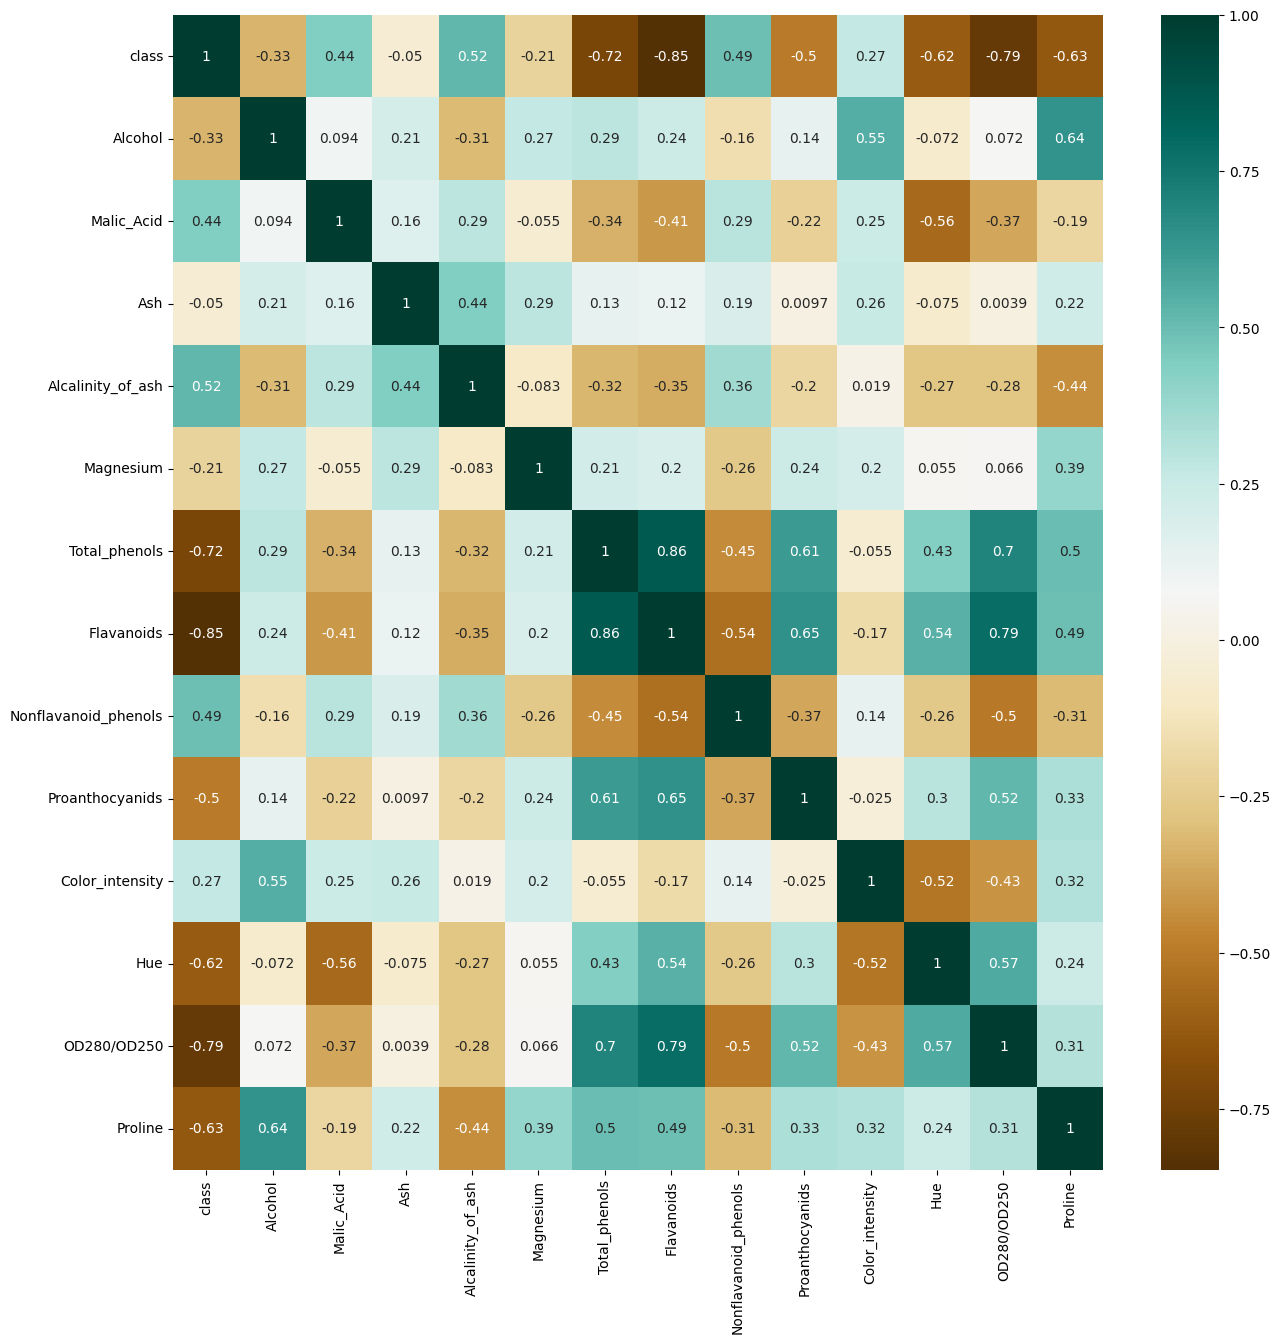

In [145]:

plt.figure(figsize = (15,15))
sns.heatmap(DatosVino.corr(), annot= True, cmap = 'BrBG')


Puede observarse que la variable objetivo tiene fuertes correlaciones negativas con Hue, OD280/OD250, Flavanoids y Total Phenols. También hay algunas variables que tienen una fuerte correlación positiva entre sí, tales como OD280/OD250 con Total Phenols y Flavanoids, y Flavanoids con Total Phenols. Esto debe tomarse en cuenta en la elaboración del modelo para no cometer overfitting.

También se separan los datos por clases de vino para ver mejor la distribición de los parámetros según la variable objetivo:

In [146]:
temp = DatosVino.loc[DatosVino['class'] == 1] 

temp.describe()


   

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
count,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
std,0.0,0.462125,0.688549,0.227166,2.546322,10.498949,0.338961,0.397494,0.070049,0.412109,1.238573,0.116483,0.357077,221.520767
min,1.0,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.820000,2.510000,680.000000
25%,1.0,13.400000,1.665000,2.295000,16.000000,98.000000,2.600000,2.680000,0.255000,1.640000,4.550000,0.995000,2.870000,987.500000
50%,1.0,13.750000,1.770000,2.440000,16.800000,104.000000,2.800000,2.980000,0.290000,1.870000,5.400000,1.070000,3.170000,1095.000000
75%,1.0,14.100000,1.935000,2.615000,18.700000,114.000000,3.000000,3.245000,0.320000,2.090000,6.225000,1.130000,3.420000,1280.000000
max,1.0,14.830000,4.040000,3.220000,25.000000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.280000,4.000000,1680.000000


In [147]:
temp = DatosVino.loc[DatosVino['class'] == 2] 

temp.describe()

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
count,71.0,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2.0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
std,0.0,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220
min,2.0,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,2.0,11.915000,1.270000,2.000000,18.000000,85.500000,1.895000,1.605000,0.270000,1.350000,2.535000,0.925000,2.440000,406.500000
50%,2.0,12.290000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.610000,2.900000,1.040000,2.830000,495.000000
75%,2.0,12.515000,2.145000,2.420000,22.000000,99.500000,2.560000,2.475000,0.430000,1.885000,3.400000,1.205000,3.160000,625.000000
max,2.0,13.860000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,985.000000


In [148]:
temp = DatosVino.loc[DatosVino['class'] == 3] 

temp.describe()

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
count,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.44750,1.153542,7.396250,0.682708,1.683542,629.895833
std,0.0,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.12414,0.408836,2.310942,0.114441,0.272111,115.097043
min,3.0,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.17000,0.550000,3.850000,0.480000,1.270000,415.000000
25%,3.0,12.805000,2.587500,2.300000,20.000000,89.750000,1.407500,0.580000,0.39750,0.855000,5.437500,0.587500,1.510000,545.000000
50%,3.0,13.165000,3.265000,2.380000,21.000000,97.000000,1.635000,0.685000,0.47000,1.105000,7.550000,0.665000,1.660000,627.500000
75%,3.0,13.505000,3.957500,2.602500,23.000000,106.000000,1.807500,0.920000,0.53000,1.350000,9.225000,0.752500,1.820000,695.000000
max,3.0,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.63000,2.700000,13.000000,0.960000,2.470000,880.000000


Vistos los estadísticos principales de los datos, es deseable también determinar cómo se distribuyen estos. Gráficamente es muy bueno realizar este proceso. A continuación, se muestra la distribución de los datos por variable, y agrupados según la variable objetivo, mediante gráficas de violín

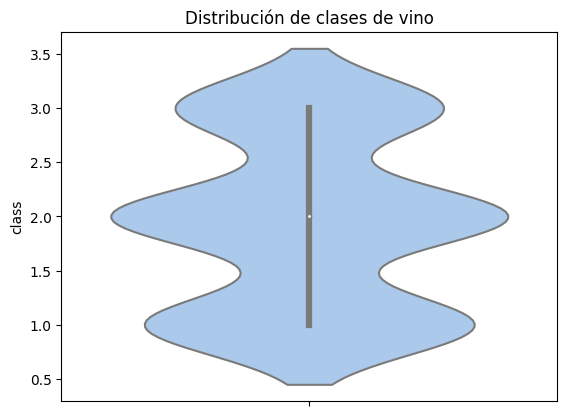

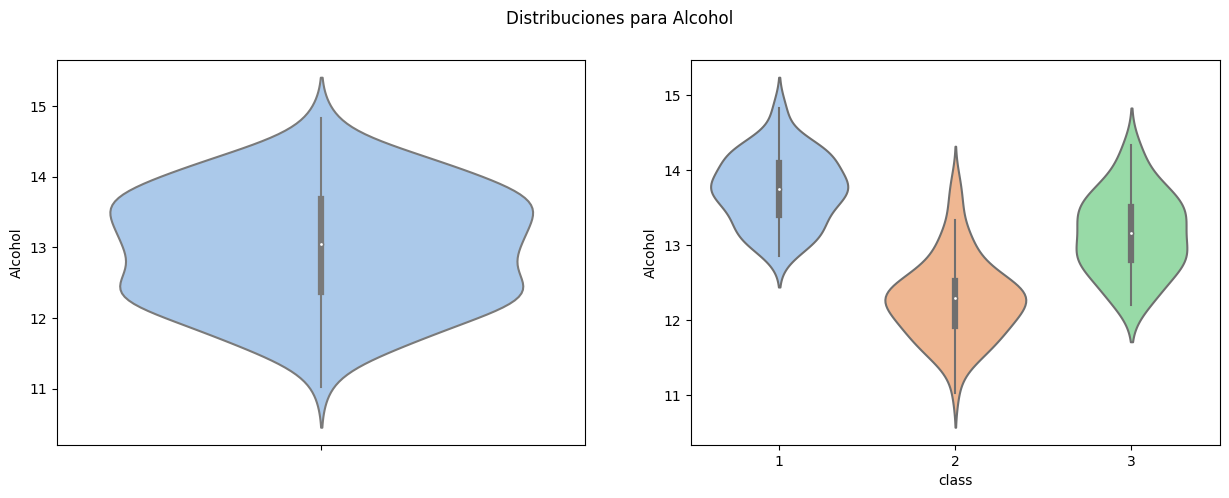

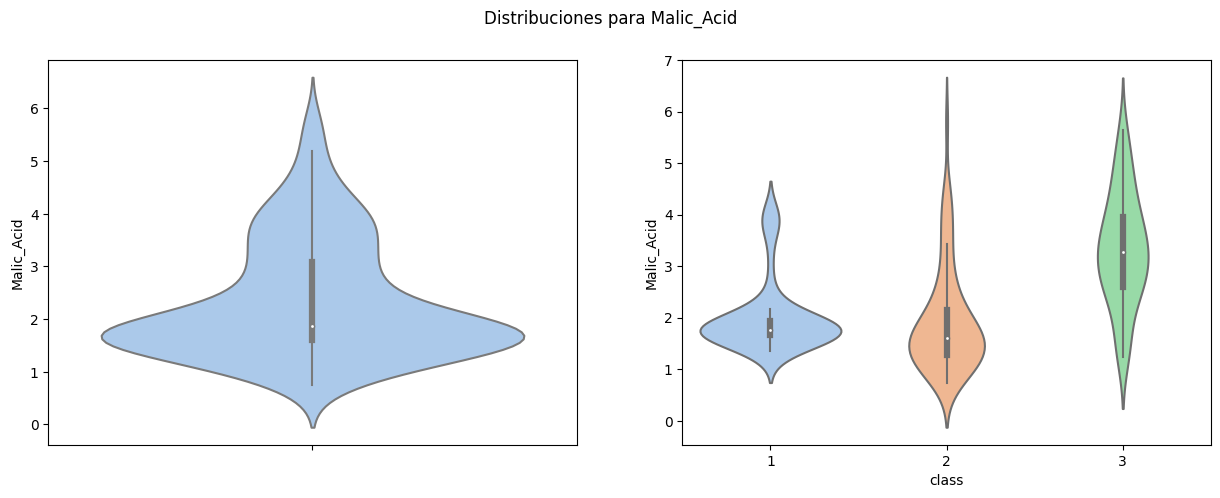

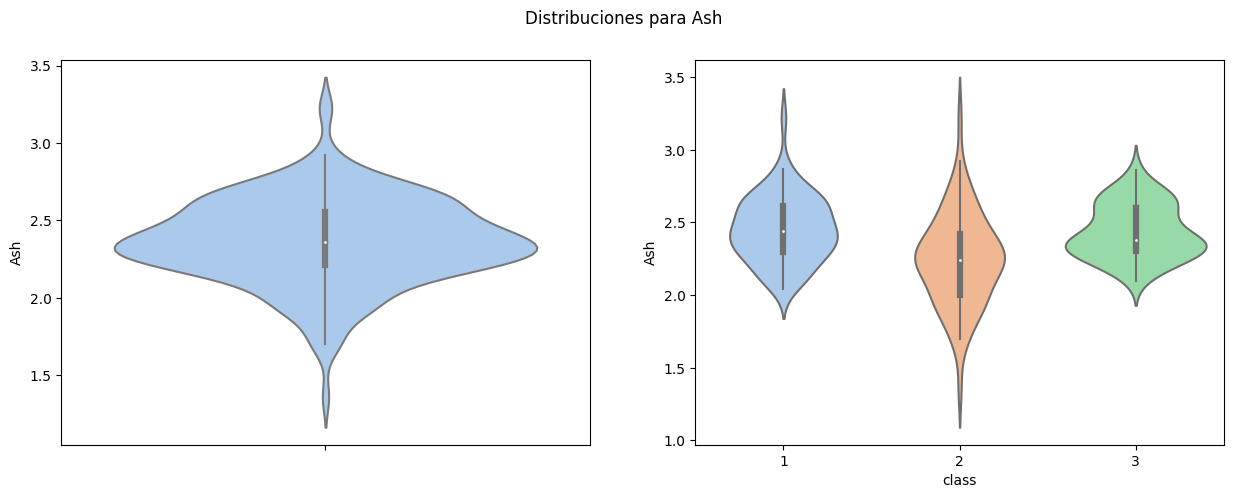

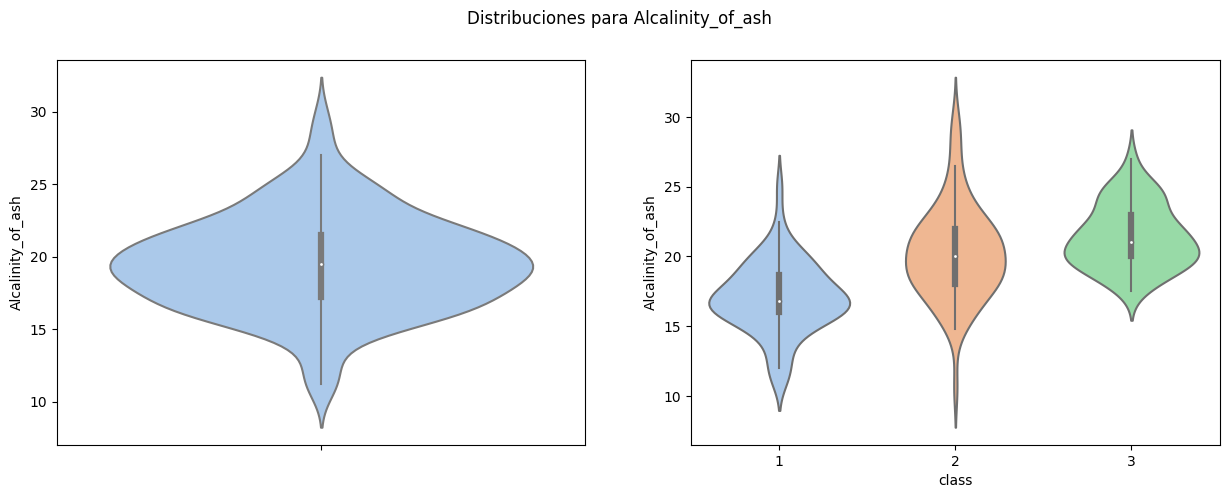

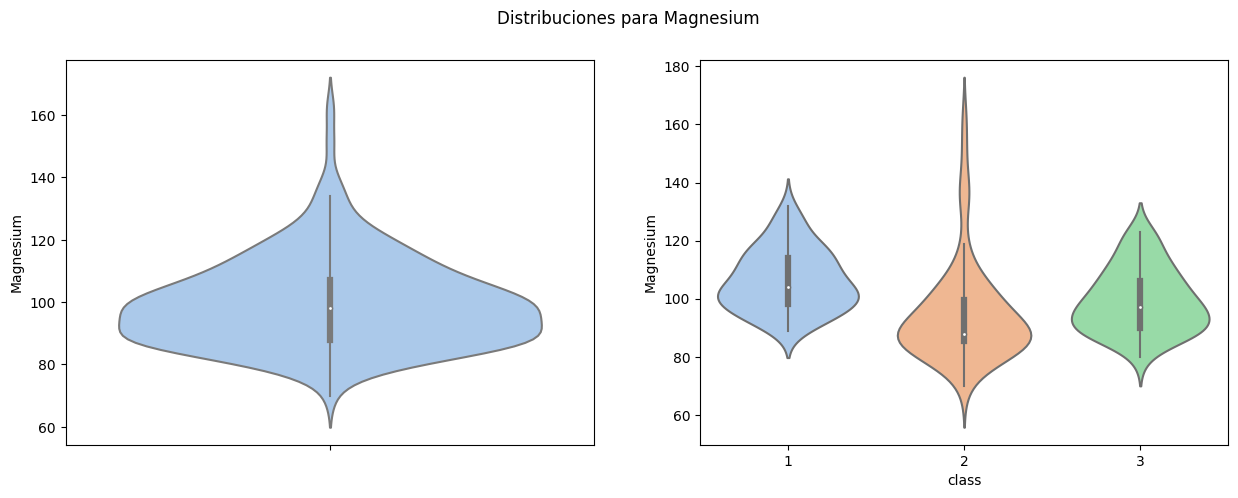

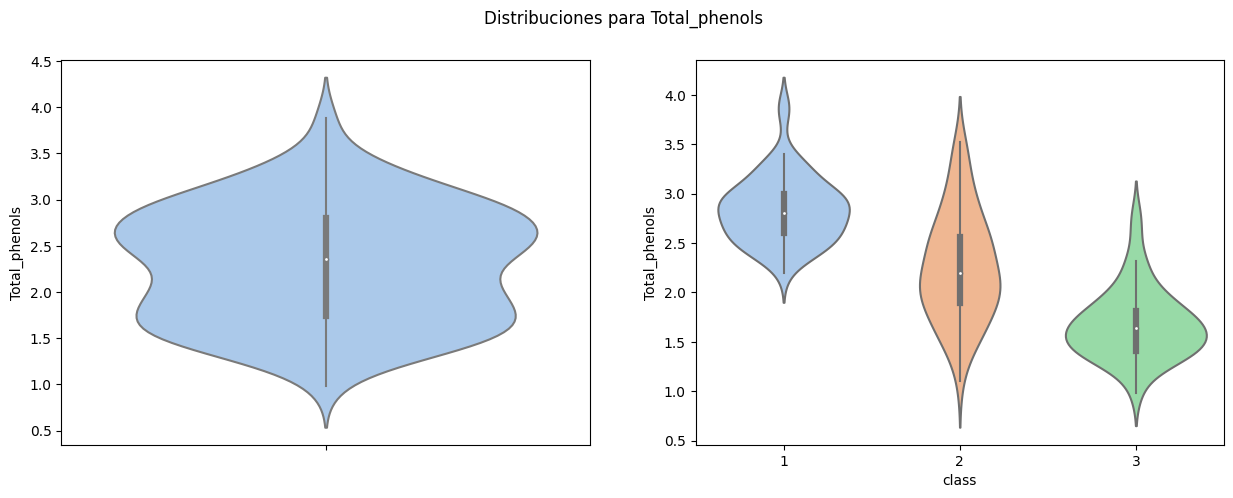

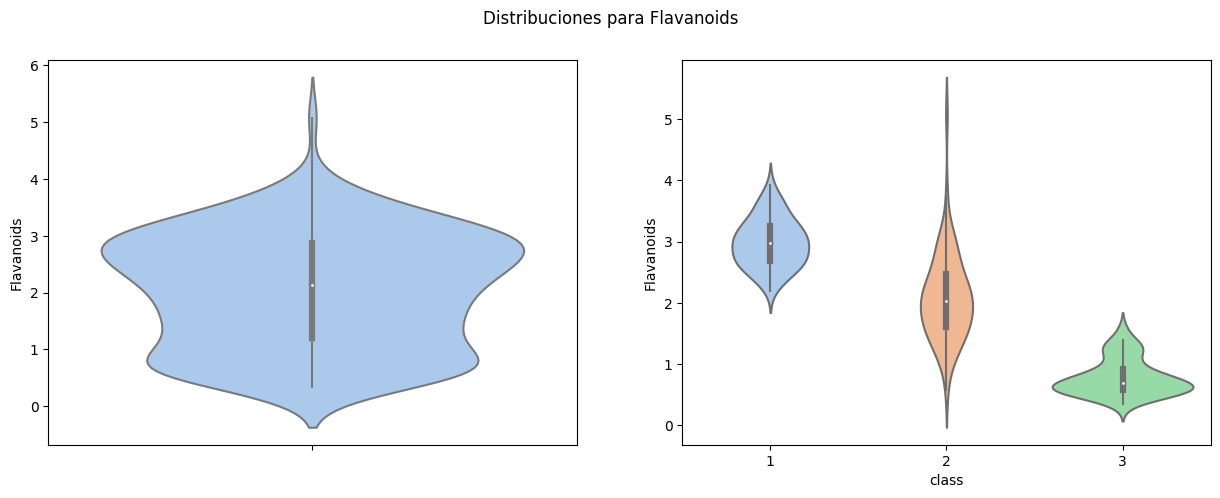

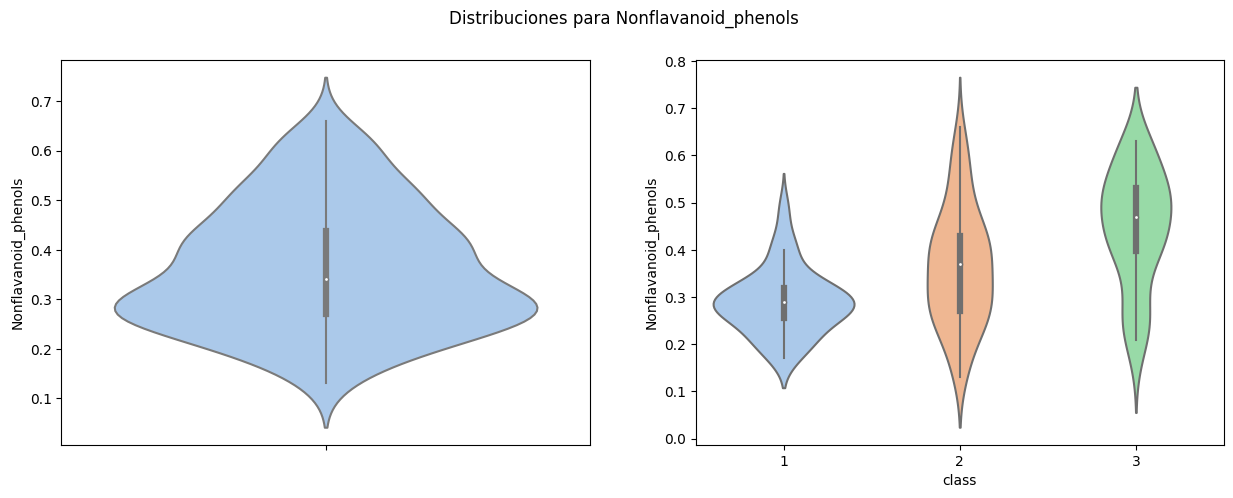

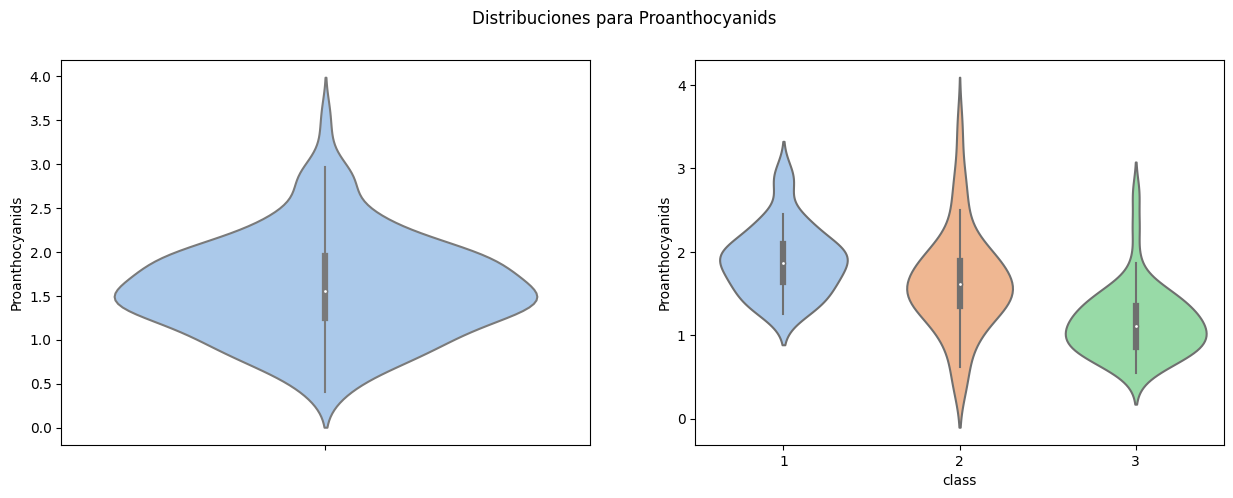

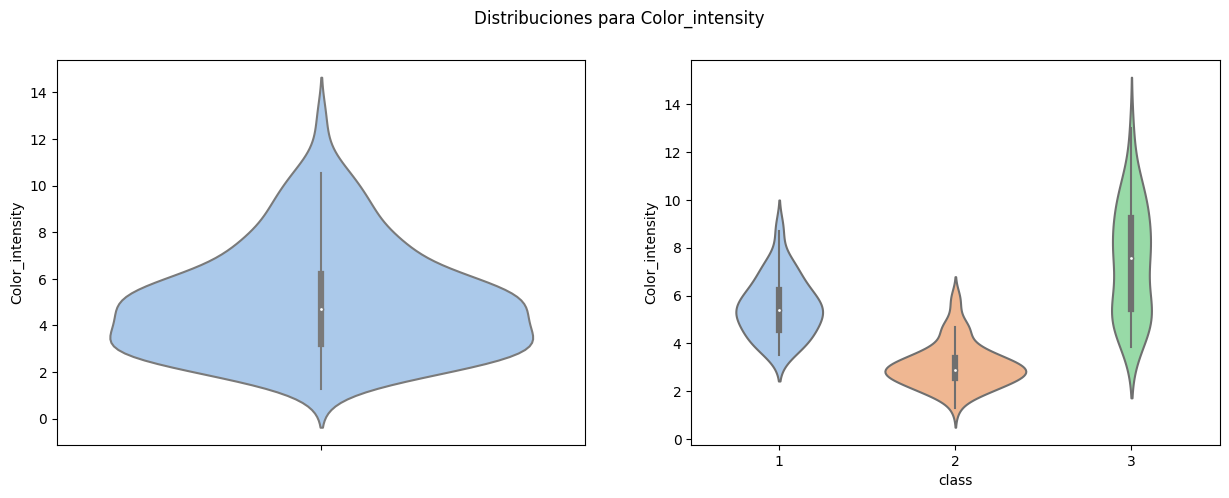

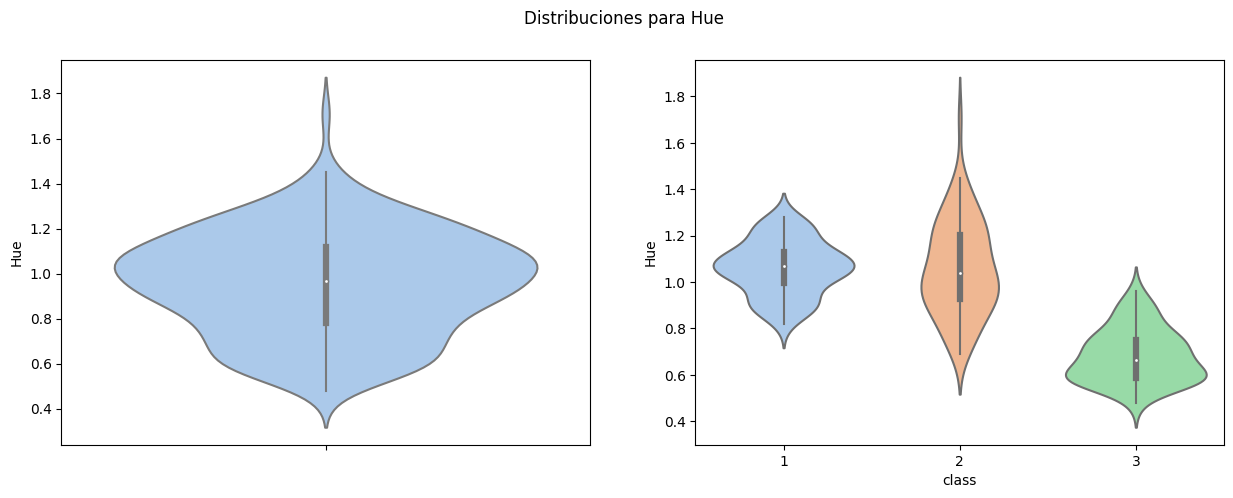

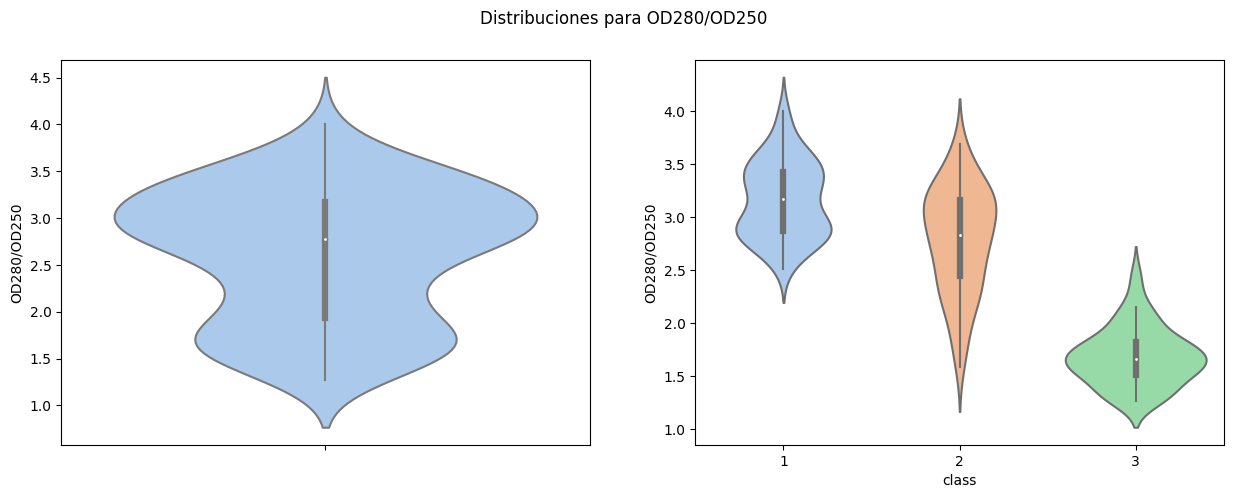

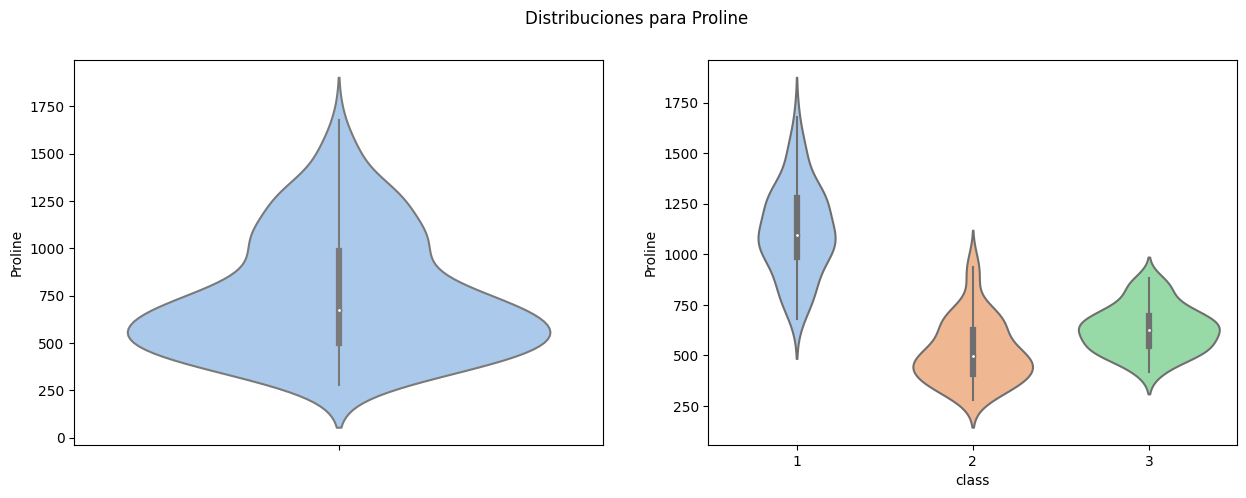

In [149]:

for value in DatosVino.columns:
    if value != 'class':
        fig,axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle(f'Distribuciones para {value}')
        sns.violinplot(ax = axes[0],data = DatosVino, y = value, palette = 'pastel')
        sns.violinplot(ax = axes[1], data = DatosVino, x = 'class', y = value, palette = 'pastel')
    else:
        plt.title('Distribución de clases de vino')
        sns.violinplot(data = DatosVino, y = value, palette = 'pastel')
        plt.show()
    

También se grafican las ditribuciones junto con un gráfico de puntos de las mediciones para identificar dónde están distribuidos para tener una mejor noción de cómo se distribuyen

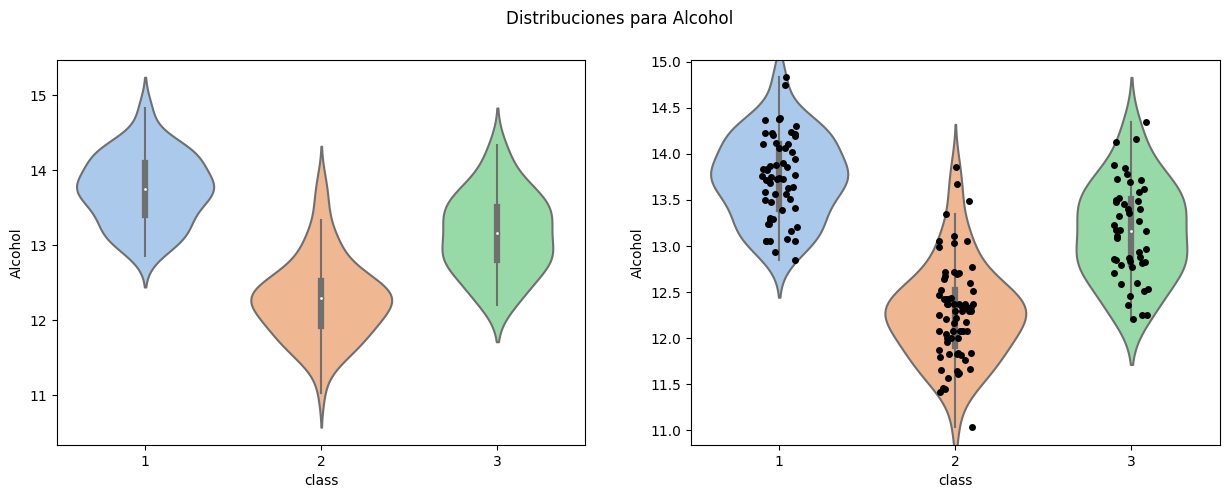

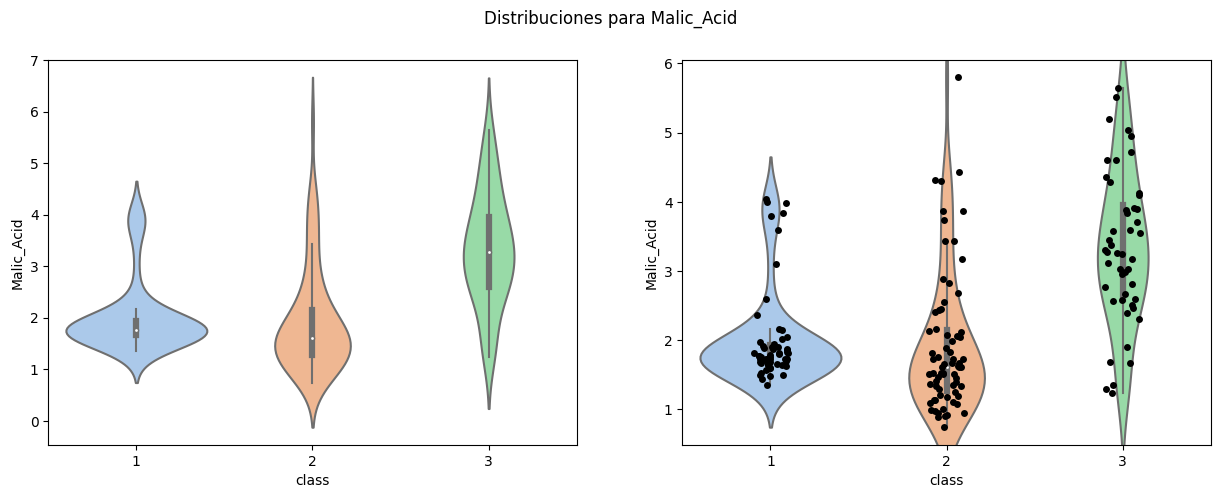

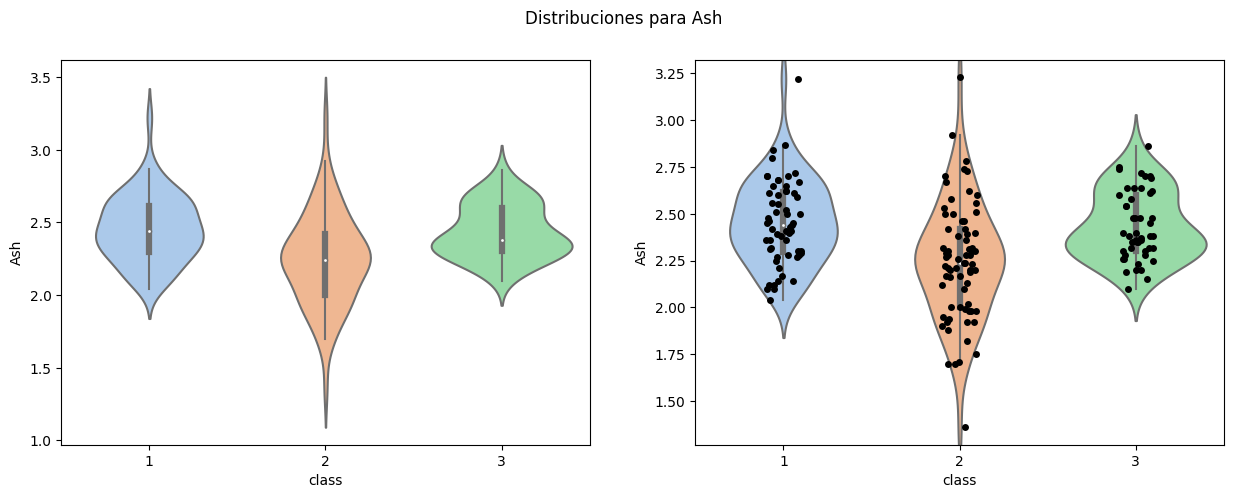

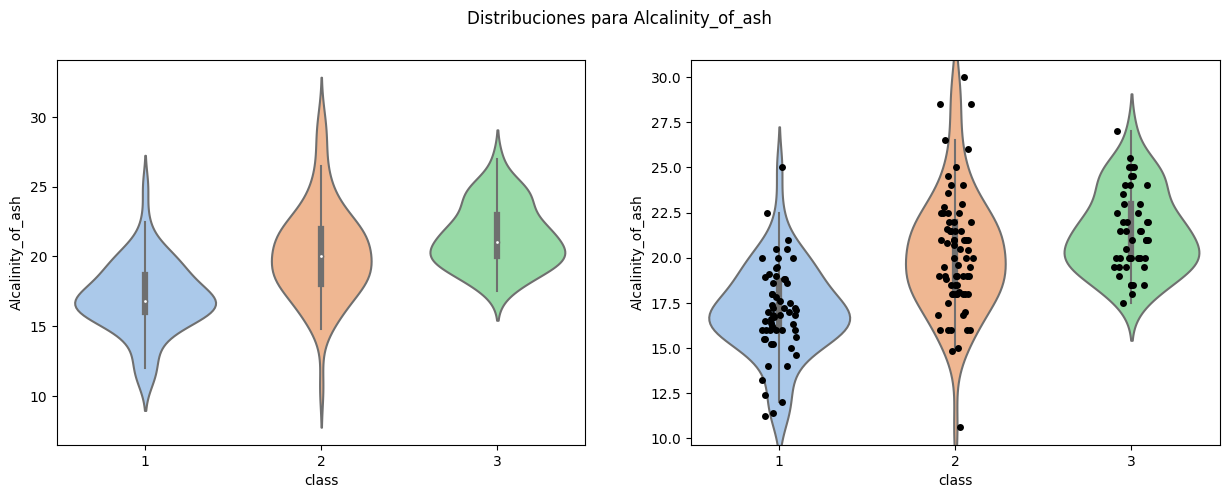

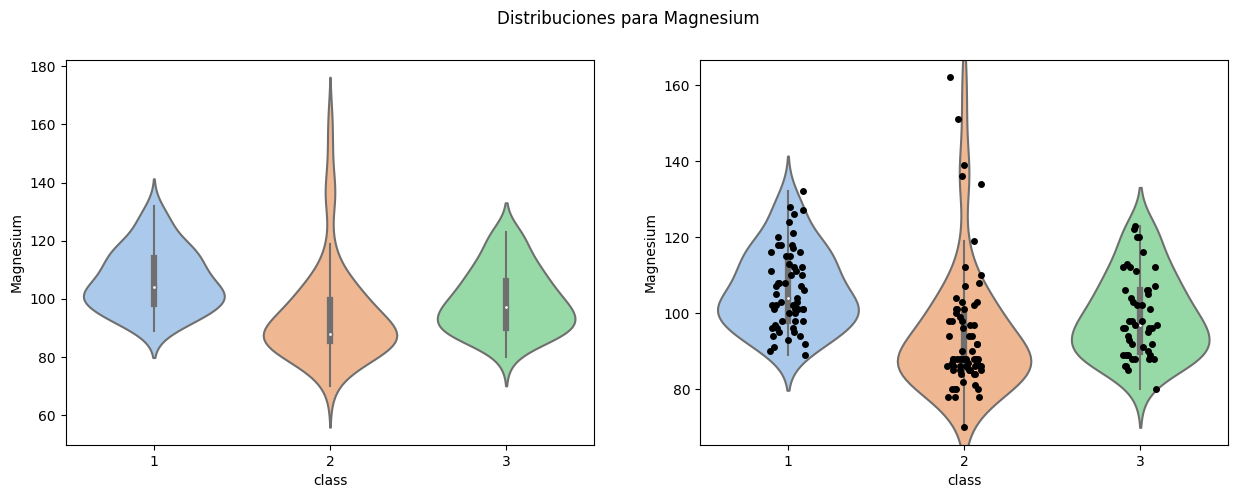

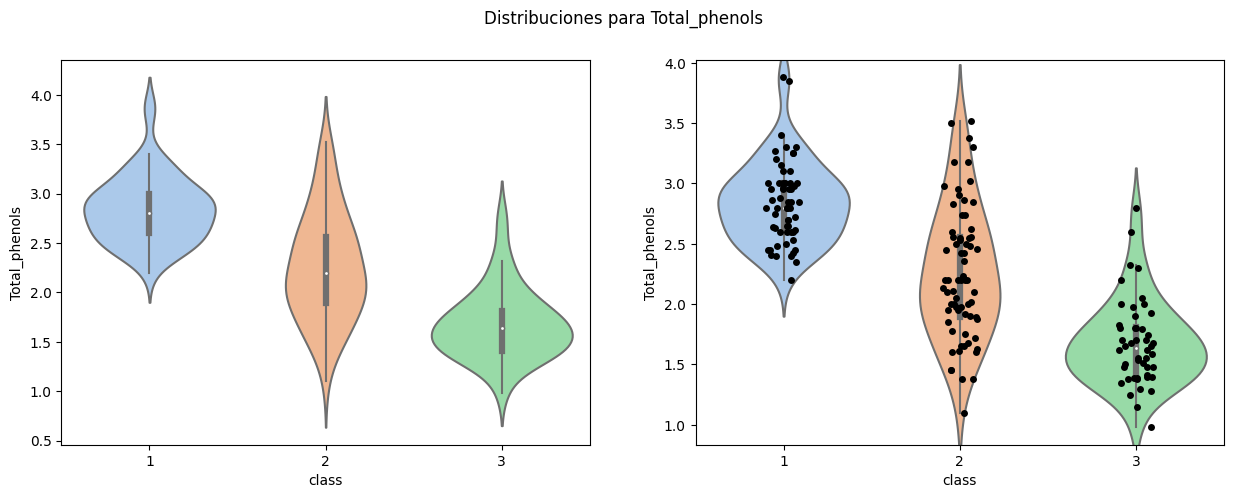

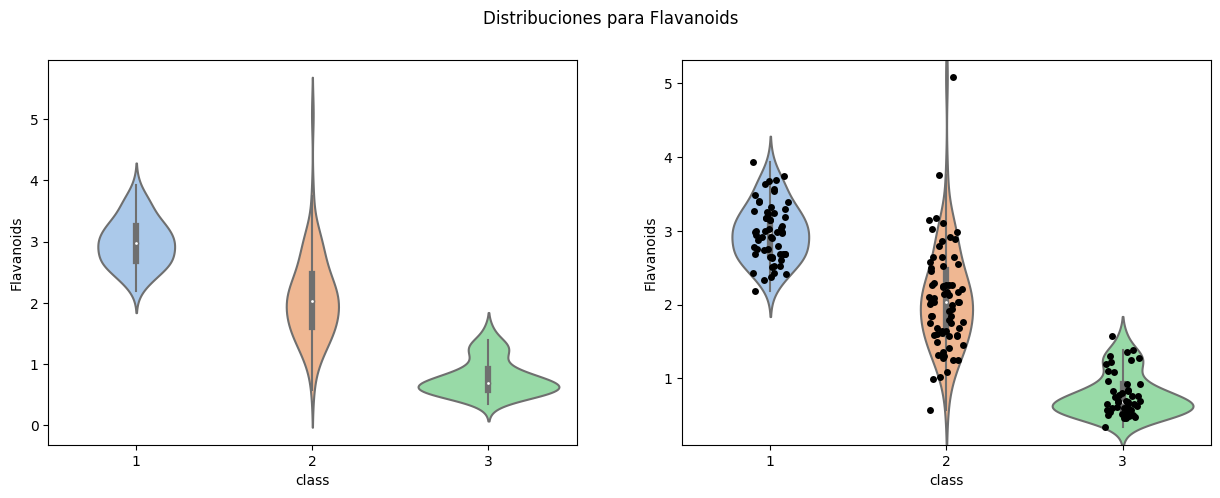

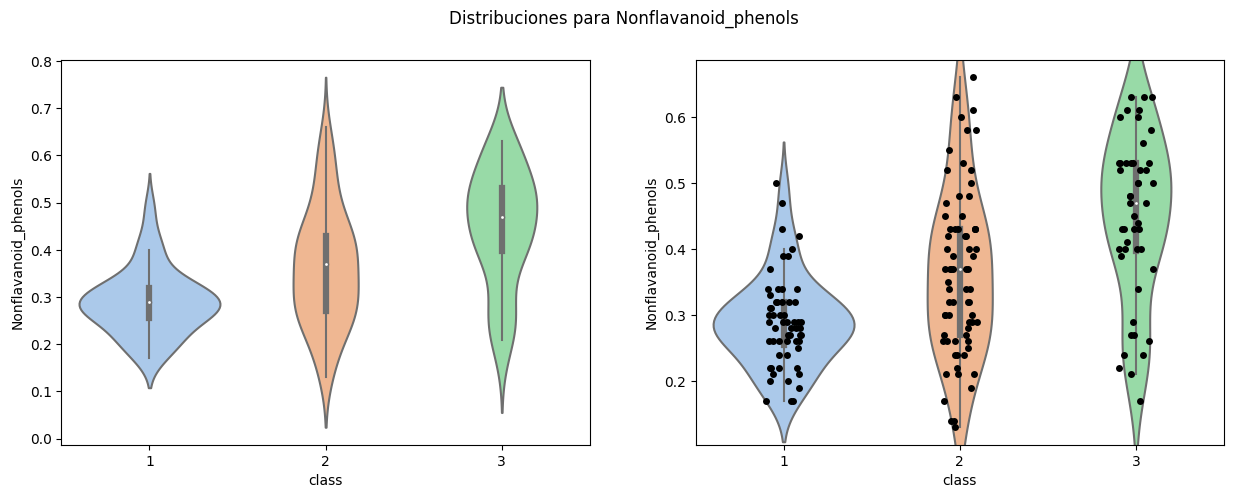

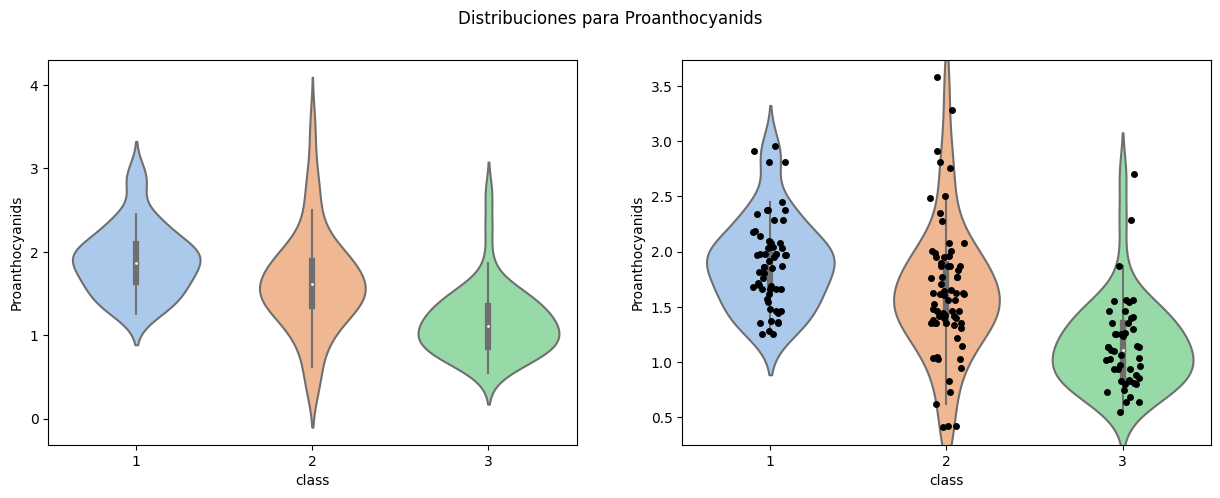

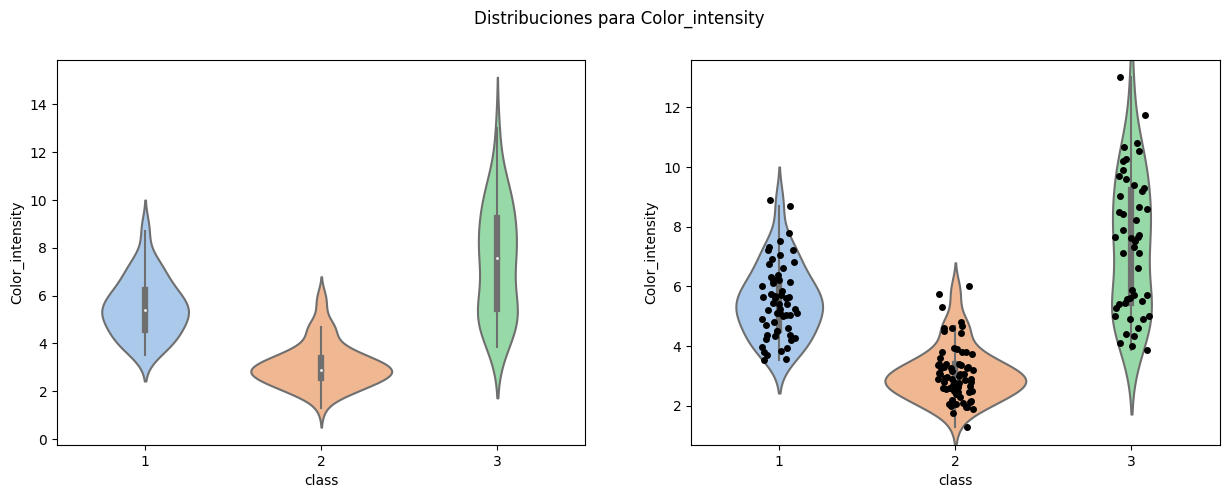

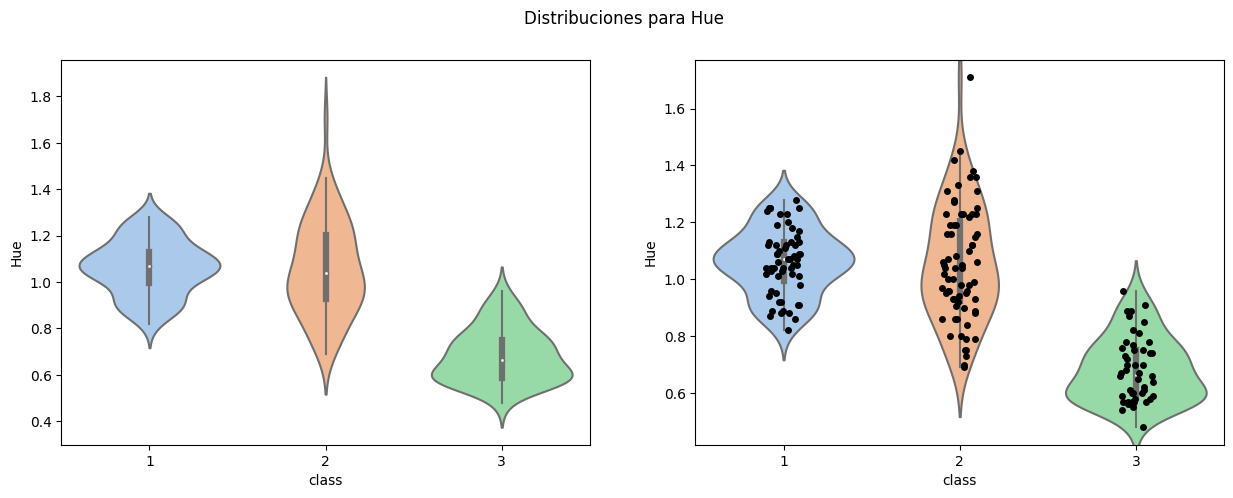

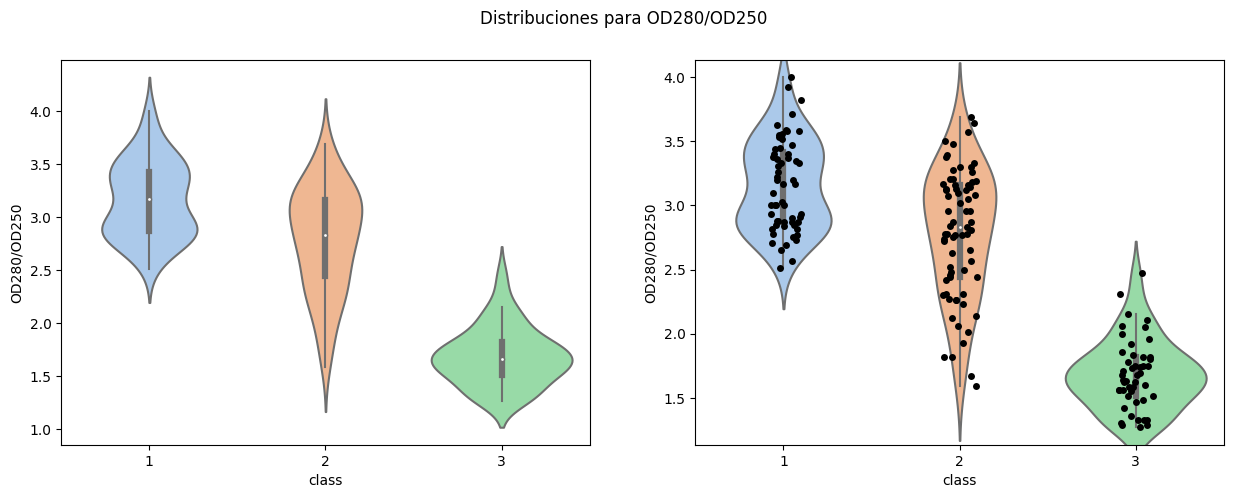

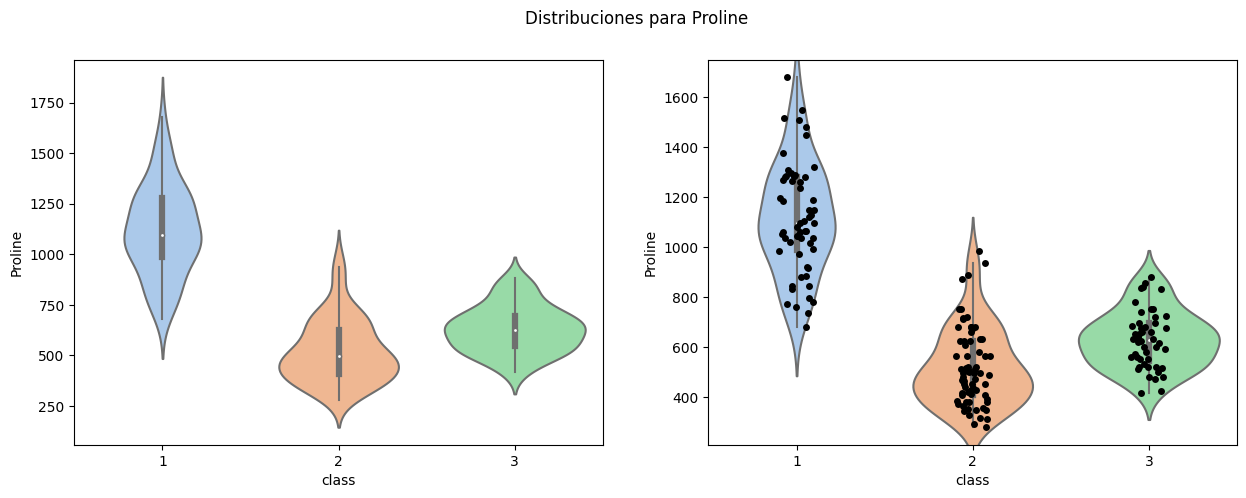

In [150]:
for value in DatosVino.columns:
    if value != 'class':
        fig,axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle(f'Distribuciones para {value}')
        sns.violinplot(ax = axes[0],data = DatosVino, x = 'class', y = value, palette = 'pastel')
        sns.violinplot(ax = axes[1], data = DatosVino, x = 'class', y = value, palette = 'pastel')
        sns.stripplot(ax = axes[1], data = DatosVino, x = 'class', y = value, color = 'black')

## Limpieza de datos

El dataset consta de 178 datos. Se considera contraproducente hacerlo más pequeño quitando outliers, por lo que la limpeza consistirá en estandarizar los datos.

### Estandarización de datos

En la exploración, pudo notarse que no todas las variables están en la misma escala. Por ejemplo, Magnesio y Prolina están en el orden de las centenas, mientras que variables como cenizas están en las unidades. Esto puede resultar en sesgos en el peso de las variables al momento de utilizarlas en predicciones, por lo que es recomendable estandarizarlas.

In [151]:
VinoEstandar = DatosVino.copy()
VinoEstandar.head()

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [152]:
VinoEstandarX = VinoEstandar.drop('class', axis = 1)
VinoEstandarX = (VinoEstandarX - VinoEstandarX.mean())/VinoEstandarX.std()
VinoEstandarX['class'] = VinoEstandar['class']
VinoEstandarX.head()

,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline,class
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,1
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,1
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,1
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,1
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,1


Para observar el cambio que hace la estandarización de los datos a las variables, se comparan sus densidades y distribución de los datos mediante gráficas de violín

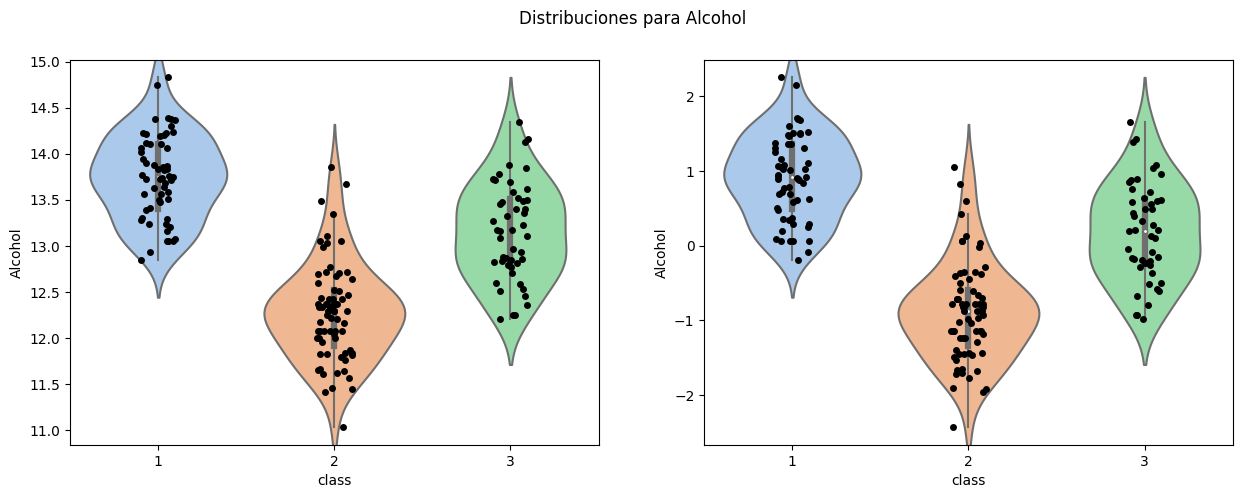

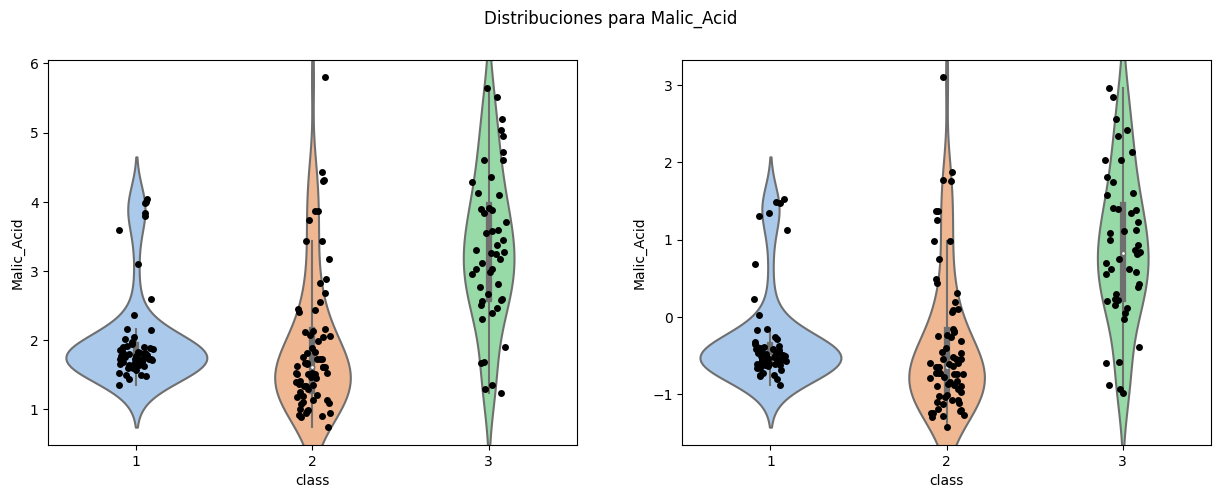

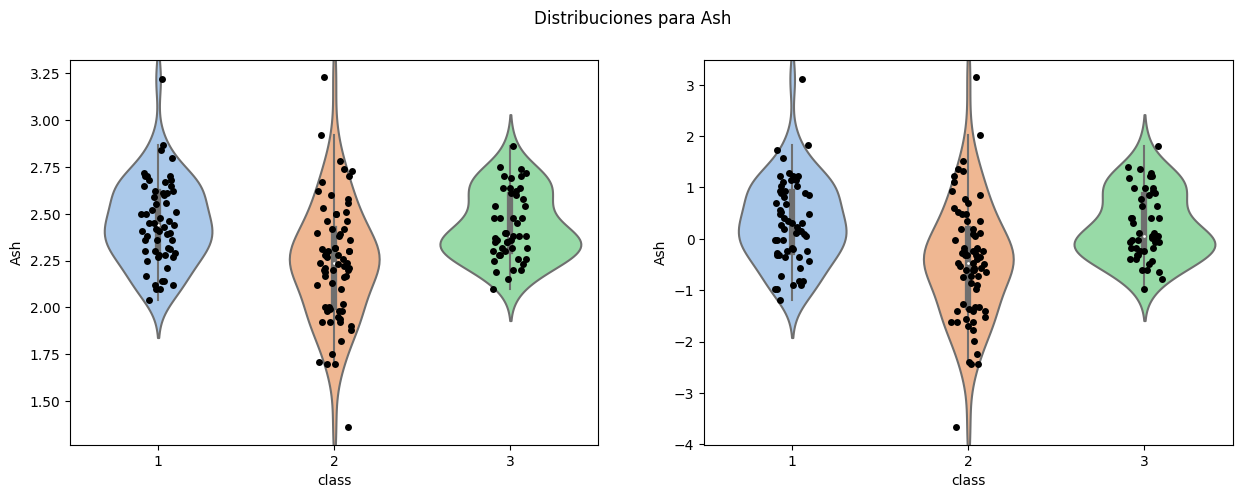

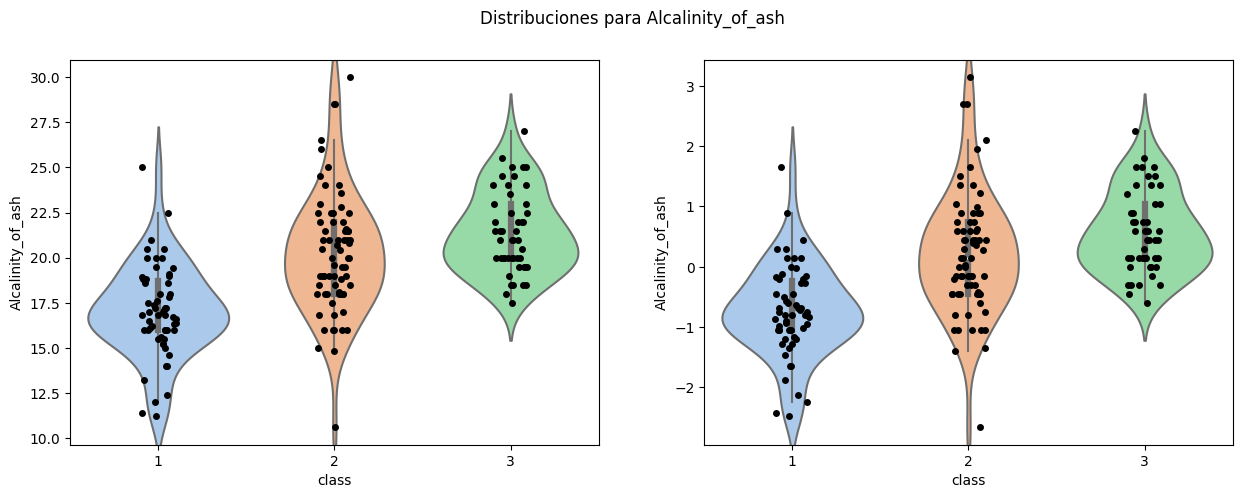

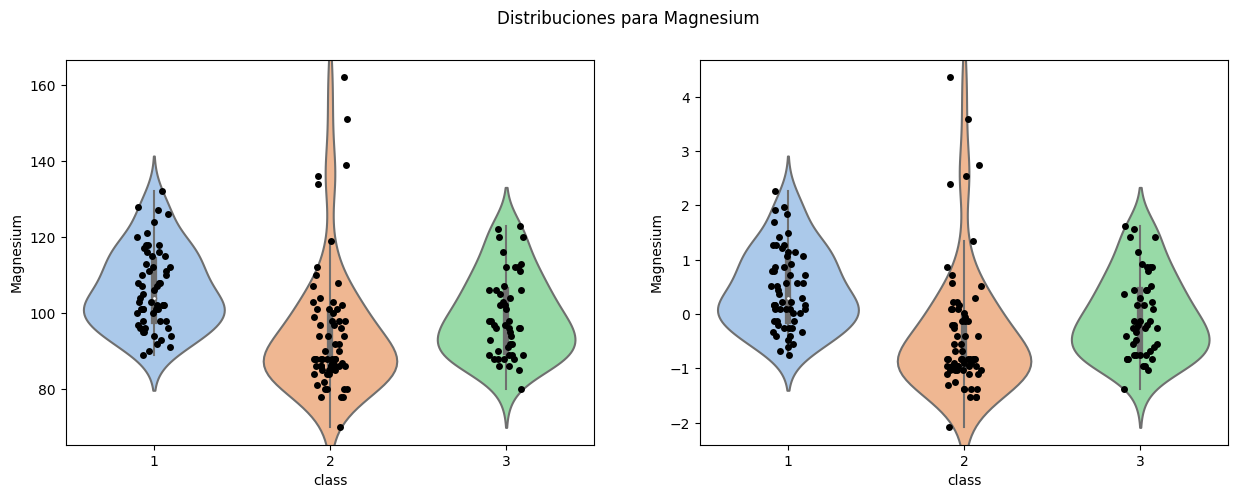

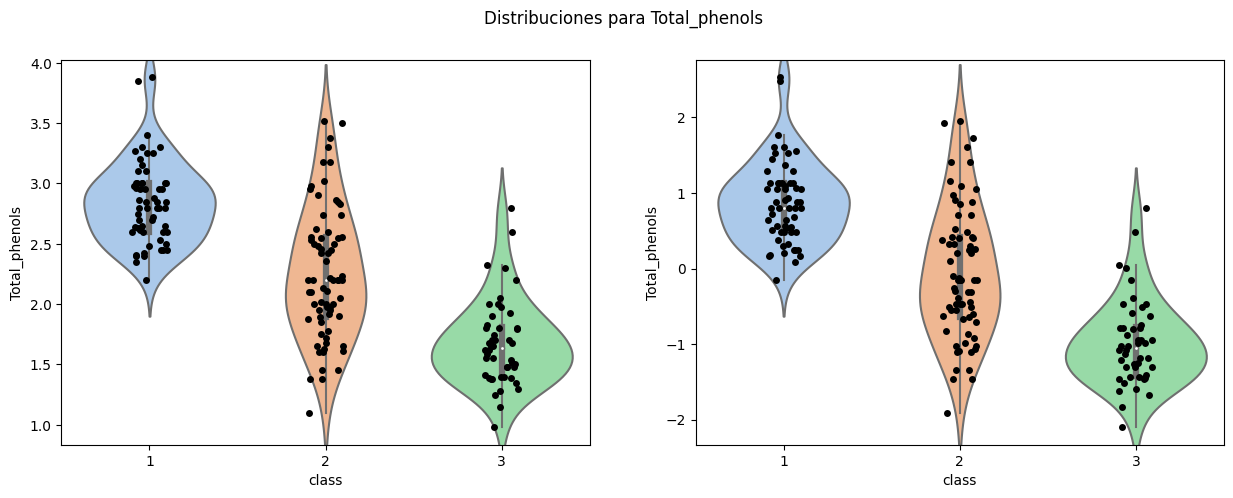

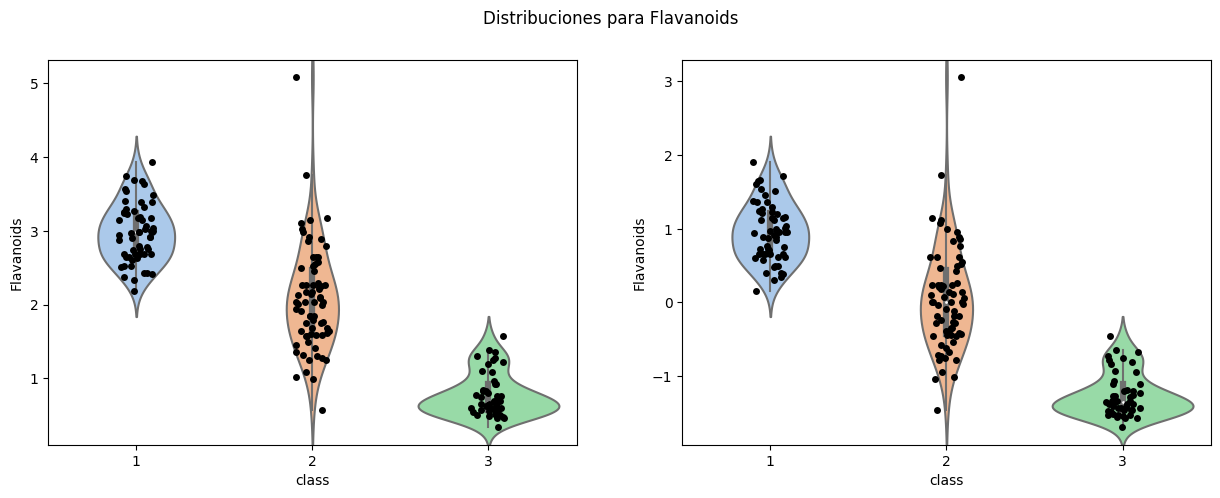

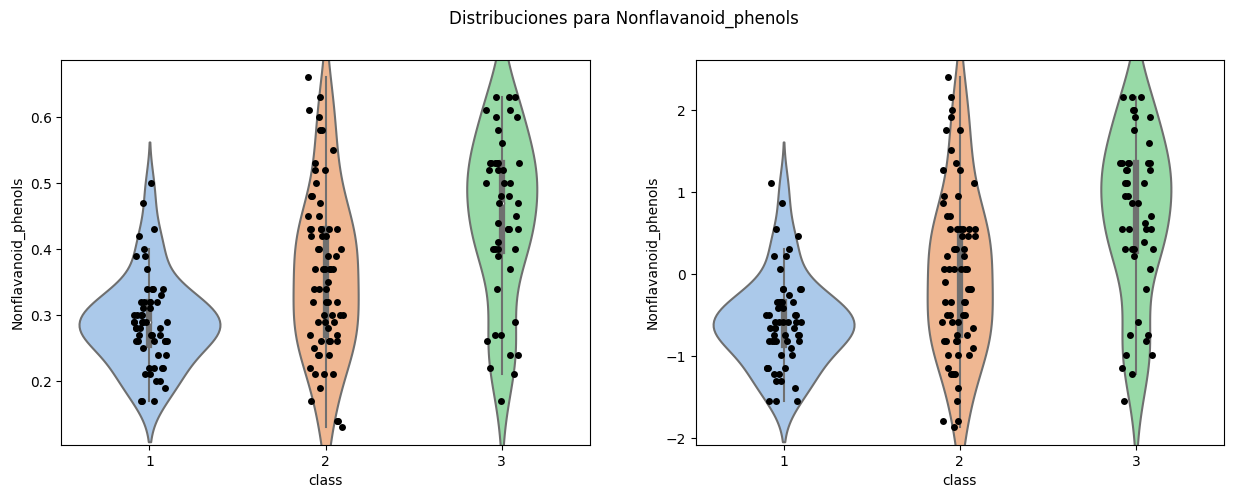

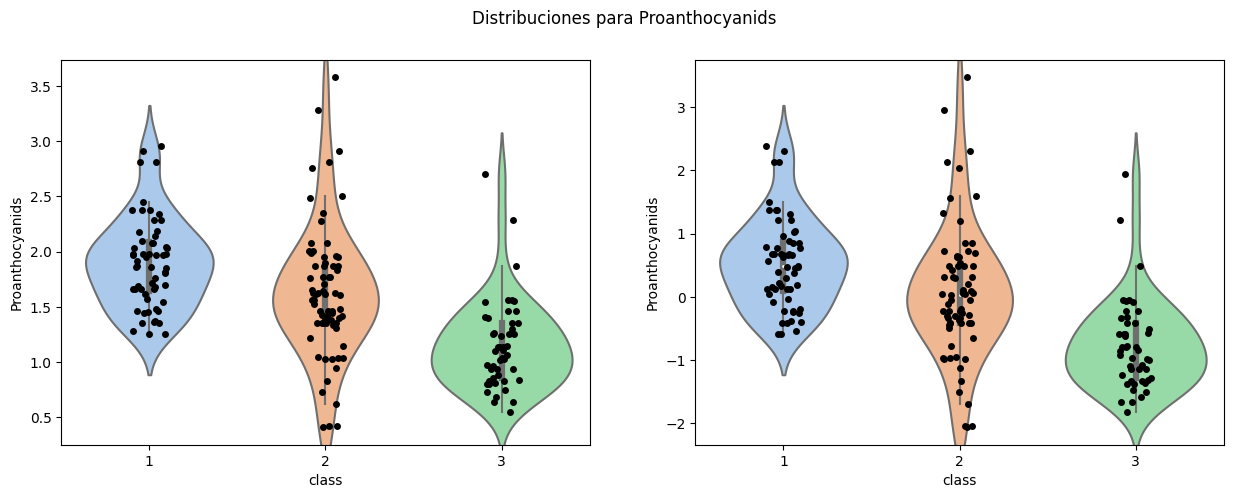

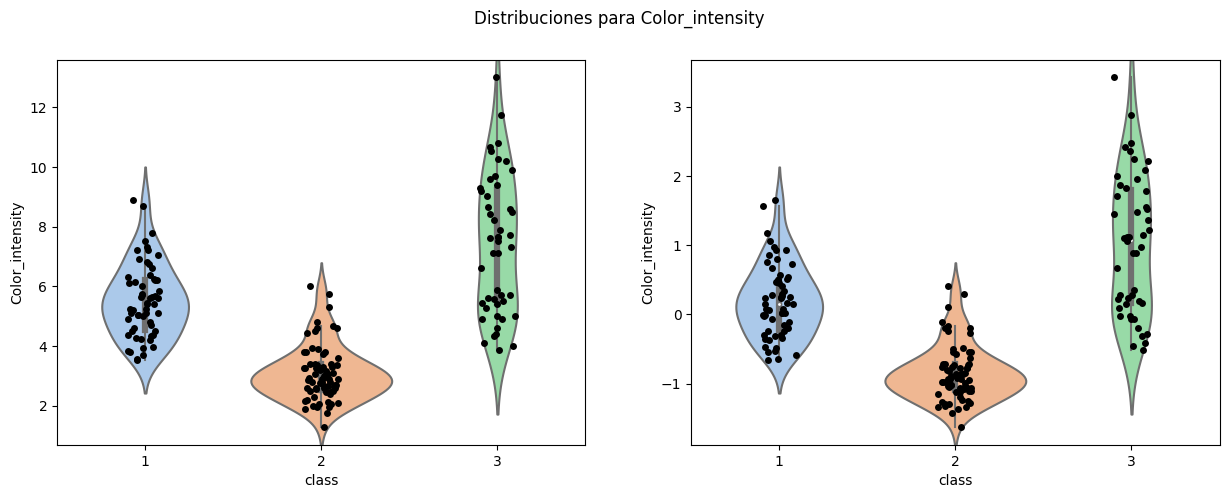

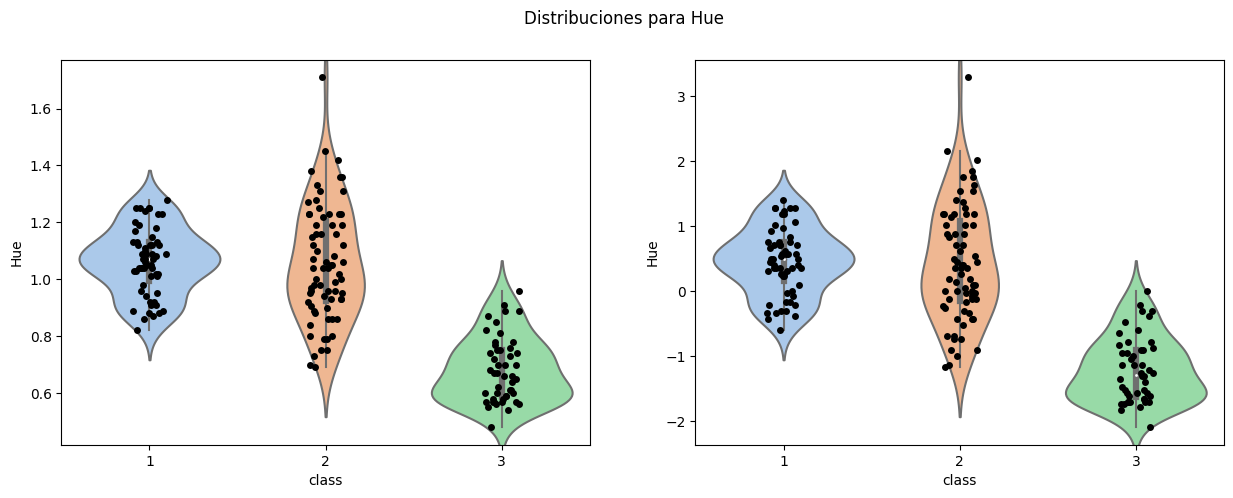

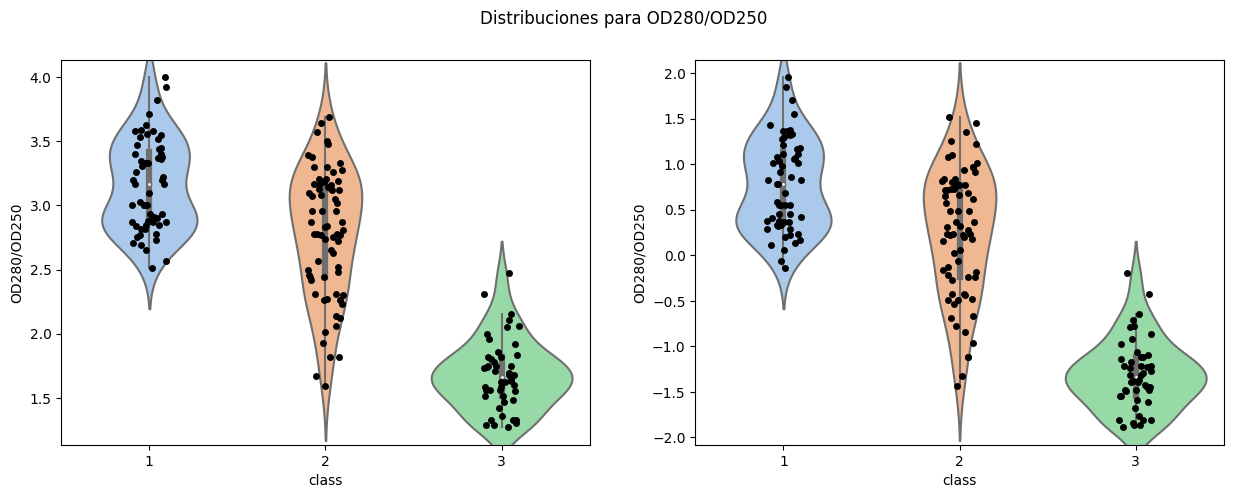

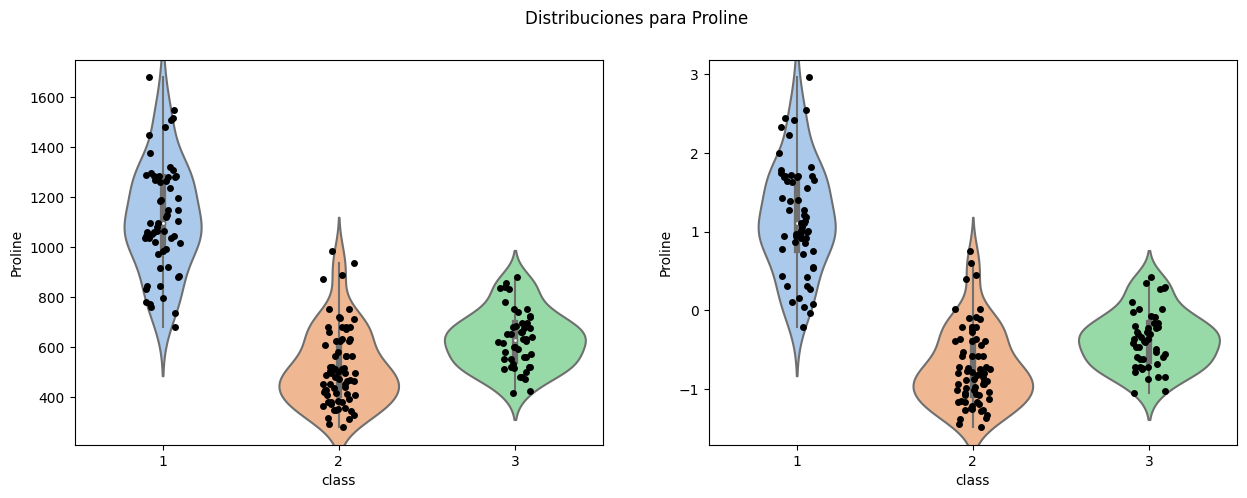

In [153]:
for value in DatosVino.columns:
    if value != 'class':
        fig,axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle(f'Distribuciones para {value}')
        sns.violinplot(ax = axes[0],data = VinoEstandar, x = 'class', y = value, palette = 'pastel')
        sns.stripplot(ax = axes[0], data = VinoEstandar, x = 'class', y = value, color = 'black')
        sns.violinplot(ax = axes[1], data = VinoEstandarX, x = 'class', y = value, palette = 'pastel')
        sns.stripplot(ax = axes[1], data = VinoEstandarX, x = 'class', y = value, color = 'black')

Puede verse que las densidades se mantinenen invariables, aunque también se ve que algunos datos se colocan en distintos puntos que antes de ser estandarizados.

### Selección de dataset a utilizar

Se selecciona el dataset a utilizar en el modelo copiándolo a una nueva variable

In [154]:
VinoFinal = VinoEstandarX.copy()

## Modelo a utilizar

Debido a la naturaleza de las variables independientes dentro de este dataset, se determinó que lo mejor es utilizar un modelo de clasificación, y el elegido fue KNN. Se optó por KNN debido a que los datos no son variables discretas, sino más bien valores continuos.


### Modelo KNN

Este modelo depende de la cantidad de vecinos que se elijan. Para esto, se correrá el modelo para distintos valores de k.

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Modelo con datos estandarizados

In [156]:
ks = 15
b = []
b.append('Random_state')
a = np.arange(1,ks, step = 1)

for value in a:
    b.append(str(value)) 
Accuracies = pd.DataFrame(columns = b)
SDs = pd.DataFrame(columns = b)

In [157]:


X = VinoFinal.drop('class', axis = 1)
Y = VinoFinal['class']



Separadas las variables independientes y dependiente, es necesario generar un set de entrenamiento y uno de pruebas. Debido a la poca cantidad de datos, se optó por utilizar un 50/50 para cada set. Además, se realizaron distintas corridas para obtener el accuracy promedio el modelo. Los valores de cada corrida para cada valor de k se guardan en dos datasets. Un dataset contiene los accuracy promedios, y el otro las desviaciones.

In [158]:

AccMedia = np.zeros((ks-1))
SdAcc = np.zeros((ks-1))
Splits = 500
for m in range(0,Splits):
    AccRow = np.zeros(ks)
    SDRow = np.zeros(ks)
    AccRow[0] = m
    SDRow[0] = m
    AccMedia = np.zeros((ks-1))
    SdAcc = np.zeros((ks-1))
    XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.5, random_state = m)
    for n in range(1,ks):
        Result = KNeighborsClassifier(n_neighbors=n).fit(XTrain,YTrain)
        YTestP = Result.predict(XTest)
        AccRow[n] = metrics.accuracy_score(YTest, YTestP)
        SDRow[n]=np.std(YTestP==YTest)/np.sqrt(YTestP.shape[0])
    Accuracies.loc[len(Accuracies)] = AccRow
    SDs.loc[len(SDs)] = SDRow


In [159]:
AccMean = Accuracies.drop('Random_state', axis = 1).mean()
SdAcc = SDs.drop('Random_state', axis = 1).mean()

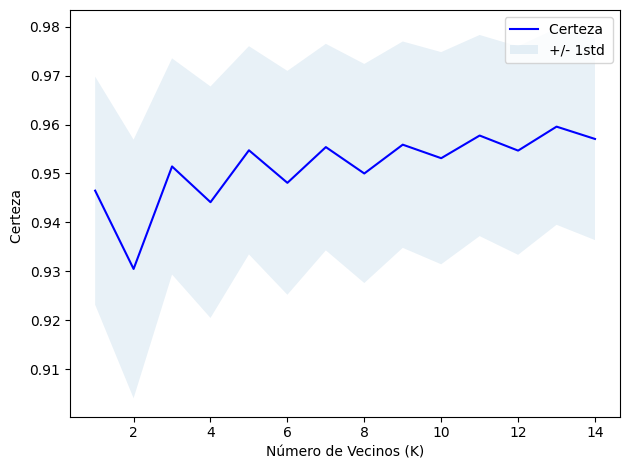

In [160]:
plt.plot(range(1,ks),AccMean,'b')
plt.fill_between(range(1,ks),(AccMean - SdAcc),(AccMean + SdAcc), alpha=0.10)
plt.legend(('Certeza ', '+/- 1std'))
plt.ylabel('Certeza ')
plt.xlabel('Número de Vecinos (K)')
plt.tight_layout()
plt.show()

En la gráfica puede verse que el accuracy máximo se obtiene para k = 13, el cual es aproximadamente 0.96

#### Modelo sin datos estandarizados

Para comparar la efectividad que tuvo la estandarización en el desempeño del modelo, se utiliza el mismo en los datos sin estandarizar:

In [161]:
ks = 15
c = []
c.append('Random_state')
a = np.arange(1,ks, step = 1)

for value in a:
    c.append(str(value)) 
AccuraciesU = pd.DataFrame(columns = c)
SDsU = pd.DataFrame(columns = c)

In [162]:

X = DatosVino.drop('class', axis = 1)
Y = DatosVino['class']

AccMedia = np.zeros((ks-1))
SdAcc = np.zeros((ks-1))
Splits = 500
for m in range(0,Splits):
    AccRow = np.zeros(ks)
    SDRow = np.zeros(ks)
    AccRow[0] = m
    SDRow[0] = m
    AccMedia = np.zeros((ks-1))
    SdAcc = np.zeros((ks-1))
    XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.5, random_state = m)
    for n in range(1,ks):
        Result = KNeighborsClassifier(n_neighbors=n).fit(XTrain,YTrain)
        YTestP = Result.predict(XTest)
        AccRow[n] = metrics.accuracy_score(YTest, YTestP)
        SDRow[n]=np.std(YTestP==YTest)/np.sqrt(YTestP.shape[0])
    AccuraciesU.loc[len(Accuracies)] = AccRow
    SDsU.loc[len(SDs)] = SDRow

AccMeanU = AccuraciesU.drop('Random_state', axis = 1).mean()
SdAccU = SDsU.drop('Random_state', axis = 1).mean()


C:\Users\Silvio Alejandro\AppData\Local\Temp\ipykernel_10612\2294402994.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(range(1,ks),AccMeanU,'b', color = 'red')


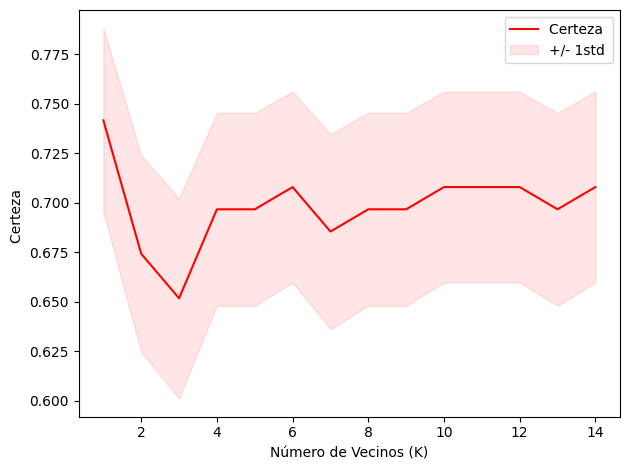

In [163]:
plt.plot(range(1,ks),AccMeanU,'b', color = 'red')
plt.fill_between(range(1,ks),(AccMeanU - SdAccU),(AccMeanU + SdAccU), alpha=0.10, color = 'red')
plt.legend(('Certeza ', '+/- 1std'))
plt.ylabel('Certeza ')
plt.xlabel('Número de Vecinos (K)')
plt.tight_layout()
plt.show()

Puede verse que el Accuracy baja al utilizar los datos no estandarizados. Para este caso, se encuentra que el máximo está en k = 1, y es alrededor de 0.75.

## Conclusiones

* El modelo KNN fue eficiente para clasificar los vinos en función de sus propiedades
* El mayor accuracy obtenido es de aproximadamente 0.96, y ocurre para k = 13
* Es necesario estandarizar los datos para obtener mejores resultados